<a href="https://colab.research.google.com/github/paolaPosada/Amelica/blob/master/Punto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
import scikitplot as skplt

## **1.** Cargar la base de datos usando la libreria pandas (Python). 
Considere la  ultima columna de
la base de datos como el vector de clases o etiquetas.

In [4]:
db = pd.read_csv('/content/HTRU_2.csv')
y = db[["CLASS"]]
x = db.loc[:,db.columns!="CLASS"]

db.head()

,MEAN,STDEV,SKEWNESS,KURTOSIS,MEANDM,DMSTDEV,DMSKEWNESS,DMKURTOSIS,CLASS
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## **2.** Usar la funcion train test split 
Separar 70 % como datos de entrenamiento y 30 % como datos de validacion y prueba.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

## **3.** Utilice los datos de entrenamiento para crear el modelo de clasificacion
(puede utilizar cualquier algoritmo de clasificacion de la librerıa scikit-learn).

Random Forest


In [ ]:
rf=RandomForestClassifier()
rf_fit = rf.fit(x_train,y_train)
rf_predict = rf_fit.predict(x_test)

## **4.** Utilice los datos de prueba para validar el desempeño del modelo.
Se recomienda investigar diferentes metricas para analizar el desempeño del modelo.

Usando Score
Retorna el promedio de la exactitud de los datos

In [9]:
scoreRf=rf_fit.score(x_test,y_test)
scoreRf

0.9798882681564246

In [24]:
print("El score de exactitud para este modelo es de "+str(scoreRf)
+" siendo un número cercano a 1 podemos concluir que es un buen modelo.")

El score de exactitud para este modelo es de 0.9798882681564246 siendo un número cercano a 1 podemos concluir que es un buen modelo.


Usando Confusion matrix


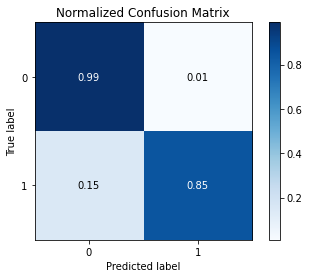

In [11]:
skplt.metrics.plot_confusion_matrix(y_test,rf_predict, normalize='true')

In [25]:
rf_Cmatrix = confusion_matrix(y_test, rf_predict)
rf_CmatrixN= rf_Cmatrix.astype('float') / rf_Cmatrix.sum(axis=1)[:, np.newaxis]

## **5.** Registre los resultados de la simulacion junto con el respectivo analisis.

In [26]:
print("De los "+ str(rf_Cmatrix[0,0]+rf_Cmatrix[0,1]) +
      " datos clasificados como 0, el modelo clasificó correctamente al "+ 
      str(round(rf_CmatrixN[0,0] *100))+"%")
print("y para la clase 1 con "+ 
      str(rf_Cmatrix[1,0]+rf_Cmatrix[1,1]) +
      " datos el módelo clasifico correctamente "+
      str(round(rf_CmatrixN[1,1] *100))+"% de ellos")

De los 4861 datos clasificados como 0, el modelo clasificó correctamente al 99%
y para la clase 1 con 509 datos el módelo clasifico correctamente 85% de ellos


## **6.** Utilice otro algoritmo de clasificacion distinto al anterior.




Support Vector Machines

In [ ]:
clf = svm.SVC()
svm_fit = clf.fit(x_train, y_train)
svm_predict = svm_fit.predict(x_test)

Usando Score


In [18]:
scoreSVM=svm_fit.score(x_test,y_test)
scoreSVM

0.9711359404096834

In [19]:
print("El score de exactitud para este modelo es de "+str(scoreSVM)
+" siendo un número cercano a 1 podemos concluir que es un buen modelo.")

El score de exactitud para este modelo es de 0.9711359404096834 siendo un número cercano a 1 podemos concluir que es un buen modelo.


Usando Confusion matrix


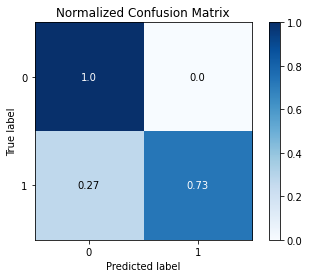

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, svm_predict, normalize='true')

In [21]:
svm_Cmatrix = confusion_matrix(y_test, svm_predict)
svm_CmatrixN= svm_Cmatrix.astype('float') / svm_Cmatrix.sum(axis=1)[:, np.newaxis]

In [22]:
print("De los "+ str(svm_Cmatrix[0,0]+svm_Cmatrix[0,1]) +
      " datos clasificados como 0, el modelo clasificó correctamente al "+ 
      str(round(svm_CmatrixN[0,0] *100))+"%")
print("para la clase 1 con "+ 
      str(svm_Cmatrix[1,0]+svm_Cmatrix[1,1]) +
      " datos el módelo clasifico correctamente "+
      str(round(svm_CmatrixN[1,1] *100))+"% de ellos")

De los 4861 datos clasificados como 0, el modelo clasificó correctamente al 100%
para la clase 1 con 509 datos el módelo clasifico correctamente 73% de ellos


## **7.** Compare los resultados de ambas simulaciones
*   Mejoro el desempeño del modelo? 
*   Es necesario hacer ajuste en los valores de los parametros o las condiciones del modelo?


Luego de 4 simulaciones para cada modelo se puede seleccionar como mejor modelo el **Random Forest**, ya que mediante la matriz de confusion se puede concluir que de los datos que hacen parte de la **clase 0**, el modelo clasifico correctamente **99.36%** de los datos (aprox.) y de los datos que hacen parte de la **clase 1** el modelo clasifico correctamente el **85.28%** de los datos (aprox.); ademas de que su  **Score** de exactitud estuvo aproximadamente en **0.9810055865921787** lo que indica que es un buen modelo por su cercania al 1.
Por otra parte el modelo de **Support Vector Machines** permitió concluir mediante la matriz de confusion que de los datos que hacen parte de la **clase 0**, el modelo clasifico correctamente **99.8%** de los datos y de los datos que hacen parte de la **clase 1** el modelo clasifico correctamente el **75.8%** de los datos, en todas las 4 simulaciones arrojo los mismos resultados, su **Score** tambien indica que es un buen modelo ya que es **0.9770949720670391**.
Basados en la cantidad de clasificaciones correctas que realizo el modelo se elige como mejor modelo el Random Forest; este mejoro con el entrenamiento, mientras que el otro no.


0    16259
1     1639
Name: CLASS, dtype: int64


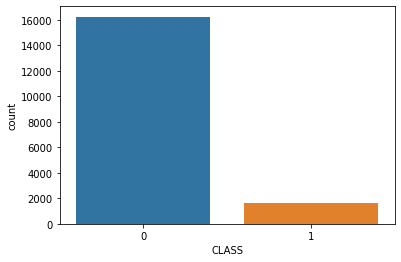

In [23]:
import seaborn as sns

sns.countplot(x='CLASS', data=db)
print(db['CLASS'].value_counts())

Como podemos ver en la grafica anterior las clases estan extremadamente desbalanceadas, para obtener unos mejores resultados a estas se les debe de aplicar un proceso de balanceo. 
Como se observo anteriormente siempre el numero de clasificaciones correctas de la clase 0 es mucho mayor que las clasificaciones correctas de la clase 1 y se debe a este debalanceo